In [1]:
from geo_func import *
import geopandas as gpd


In [2]:
data = gpd.read_file('geometry_data/VNM_adm3.shp')

In [33]:
data = gpd.read_file('geometry_data/VNM_adm3.shp')
data = gpd.GeoDataFrame(data, crs='WGS84')
data.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,250,VNM,Vietnam,1,Đà Nẵng,1,Cẩm Lệ,1,Hòa Phát,0,None,Commune,Commune,None,None,"POLYGON ((108.17028 16.01591, 108.16991 16.016..."
1,250,VNM,Vietnam,1,Đà Nẵng,1,Cẩm Lệ,2,Hòa Xuân,0,None,Commune,Commune,None,None,"POLYGON ((108.20899 15.99559, 108.21204 15.999..."


In [23]:
DL = data[data['NAME_2']=='Cần Đước']
DL=DL[DL['NAME_3']=='Long Hựu Tây']
DL.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
5994,250,VNM,Vietnam,39,Long An,408,Cần Đước,5995,Long Hựu Tây,0,None,Commune,Commune,None,None,"POLYGON ((106.67139 10.43880, 106.67103 10.438..."


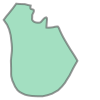

In [30]:
DL['geometry'].iloc[0]

In [29]:
data = read_geopandas_data()
data

5485    POLYGON ((108.49611 11.96060, 108.49569 11.960...
Name: geometry, dtype: geometry

In [30]:
side_length=0.025
data.envelope

5485    POLYGON ((108.46599 11.95429, 108.50732 11.954...
dtype: geometry

In [31]:
data.bounds

,minx,miny,maxx,maxy
5485,108.465988,11.954291,108.507317,11.992592


In [32]:
x1, y1, x2, y2 = data.bounds.iloc[0]
width = x2 - x1
height = y2 - y1
x1, y1, x2, y2

(108.4659881591798, 11.954291343689022, 108.50731658935553, 11.992591857910156)

In [33]:
xcells = int(np.round(width / side_length))
ycells = int(np.round(height / side_length))
xcells, ycells

(2, 2)

In [34]:
yindices = np.linspace(y1, y2, ycells + 1)
xindices = np.linspace(x1, x2, xcells + 1)
xindices,yindices

(array([108.46598816, 108.48665237, 108.50731659]),
 array([11.95429134, 11.9734416 , 11.99259186]))

In [35]:
horizontal_splitters = [
        LineString([(x, yindices[0]), (x, yindices[-1])]) for x in xindices
    ]
vertical_splitters = [
    LineString([(xindices[0], y), (xindices[-1], y)]) for y in yindices
]
horizontal_splitters, vertical_splitters

([<LINESTRING (108.466 11.954, 108.466 11.993)>,
  <LINESTRING (108.487 11.954, 108.487 11.993)>,
  <LINESTRING (108.507 11.954, 108.507 11.993)>],
 [<LINESTRING (108.466 11.954, 108.507 11.954)>,
  <LINESTRING (108.466 11.973, 108.507 11.973)>,
  <LINESTRING (108.466 11.993, 108.507 11.993)>])

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

G = np.random.choice(data.geometry.values)

In [37]:
Rectangle    = G.envelope
squares      = get_squares_from_rect(Rectangle, side_length=0.025)

In [38]:
squares

[<POLYGON ((108.507 11.954, 108.487 11.954, 108.487 11.973, 108.507 11.973, 1...>,
 <POLYGON ((108.487 11.954, 108.466 11.954, 108.466 11.973, 108.487 11.973, 1...>,
 <POLYGON ((108.466 11.973, 108.466 11.993, 108.487 11.993, 108.487 11.973, 1...>,
 <POLYGON ((108.487 11.993, 108.507 11.993, 108.507 11.973, 108.487 11.973, 1...>]

In [39]:
SquareGeoDF  = gpd.GeoSeries(squares)
SquareGeoDF

0    POLYGON ((108.50732 11.95429, 108.48665 11.954...
1    POLYGON ((108.48665 11.95429, 108.46599 11.954...
2    POLYGON ((108.46599 11.97344, 108.46599 11.992...
3    POLYGON ((108.48665 11.99259, 108.50732 11.992...
dtype: geometry

In [40]:
SquareGeoDF = SquareGeoDF.set_crs('EPSG:32649')
SquareGeoDF

0    POLYGON ((108.507 11.954, 108.487 11.954, 108....
1    POLYGON ((108.487 11.954, 108.466 11.954, 108....
2    POLYGON ((108.466 11.973, 108.466 11.993, 108....
3    POLYGON ((108.487 11.993, 108.507 11.993, 108....
dtype: geometry

In [41]:
Geoms        = SquareGeoDF.geometry
Geoms

0    POLYGON ((108.507 11.954, 108.487 11.954, 108....
1    POLYGON ((108.487 11.954, 108.466 11.954, 108....
2    POLYGON ((108.466 11.973, 108.466 11.993, 108....
3    POLYGON ((108.487 11.993, 108.507 11.993, 108....
dtype: geometry

In [42]:
geoms = [g for g in Geoms if ((g.intersection(G)).area / g.area) >= 0.9]
geoms

[]

In [43]:
G = np.random.choice(data.geometry.values)
squares   = split_polygon(G,shape='square',thresh=0,side_length=0.005)

In [44]:
squares

[<POLYGON ((108.507 11.954, 108.502 11.954, 108.502 11.959, 108.507 11.959, 1...>,
 <POLYGON ((108.502 11.954, 108.497 11.954, 108.497 11.959, 108.502 11.959, 1...>,
 <POLYGON ((108.497 11.954, 108.492 11.954, 108.492 11.959, 108.497 11.959, 1...>,
 <POLYGON ((108.492 11.954, 108.487 11.954, 108.487 11.959, 108.492 11.959, 1...>,
 <POLYGON ((108.487 11.954, 108.481 11.954, 108.481 11.959, 108.487 11.959, 1...>,
 <POLYGON ((108.481 11.954, 108.476 11.954, 108.476 11.959, 108.481 11.959, 1...>,
 <POLYGON ((108.476 11.954, 108.471 11.954, 108.471 11.959, 108.476 11.959, 1...>,
 <POLYGON ((108.471 11.954, 108.466 11.954, 108.466 11.959, 108.471 11.959, 1...>,
 <POLYGON ((108.466 11.959, 108.466 11.964, 108.471 11.964, 108.471 11.959, 1...>,
 <POLYGON ((108.471 11.964, 108.476 11.964, 108.476 11.959, 108.471 11.959, 1...>,
 <POLYGON ((108.476 11.964, 108.481 11.964, 108.481 11.959, 108.476 11.959, 1...>,
 <POLYGON ((108.481 11.964, 108.487 11.964, 108.487 11.959, 108.481 11.959, 1...>,
 <PO

In [45]:
geo_series = gpd.GeoSeries([squares[56], squares[0]])
geo_series

0    POLYGON ((108.46599 11.98780, 108.46599 11.992...
1    POLYGON ((108.50732 11.95429, 108.50215 11.954...
dtype: geometry

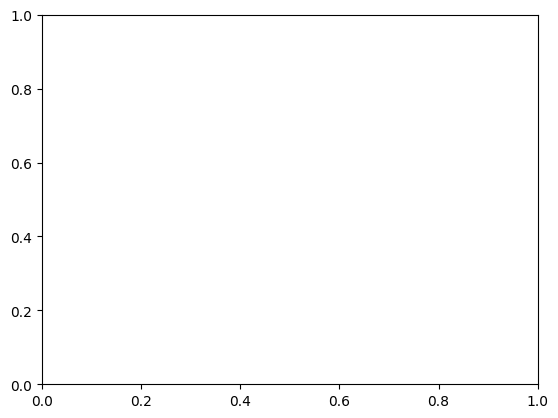

In [46]:
fig, ax = plt.subplots()

In [47]:
geo_series.plot(color = 'red', ax=ax)
data.exterior.plot(color='blue', ax= ax)
plt.show()

<Figure size 640x480 with 0 Axes>

In [48]:
from image_downloading import run


for idx, bound in enumerate(geo_series):
    #run func for downloading images and saving them
    run(idx=idx,bound=bound.bounds)
    pass

Saved as 0.png
Saved as 1.png


In [5]:
import cv2
import os

In [19]:
fi = cv2.imread("annotations\\0.png")

In [25]:
path = r"data\\annotations\\Lâm Đồng\\Đà Lạt\\12\\1.png"

In [26]:
# file_path =os.path.join(path,"1.png")
file_path=path
file_path

'data\\\\annotations\\\\Lâm Đồng\\\\Đà Lạt\\\\12\\\\1.png'

In [9]:
fi = open(file_path,"r")
fi

In [49]:
path = r"data\\annotations\\Lâm Đồng\\Đà Lạt\\12\\1.png"
unicode_path = path.encode('utf-8').decode('unicode_escape')
fi = cv2.imread(unicode_path)

In [50]:
unicode_path

'data\\annotations\\LÃ¢m Ä\x90á»\x93ng\\Ä\x90Ã\xa0 Láº¡t\\12\\1.png'

In [44]:
cv2.imshow("a",fi)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [63]:
import imageio.v3 as iio
import cv2
import os

# Ensure the path is correctly handled
path = "data\\annotations\\Lâm Đồng\\Đà Lạt\\12\\1.png"

# Convert to absolute path
# absolute_path = os.path.abspath(path)

# Check if the file exists
if not os.path.exists(path):
    print(f"File does not exist: {path}")
else:
    try:
        # Read the image using imageio
        image = iio.imread(path)

        # Convert the image to a format compatible with OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Display the image
        cv2.imshow("Image", image)
        # Wait for a key press to close the window
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except Exception as e:
        print(f"Failed to read the image with imageio: {e}")


In [54]:
!pip install imageio

     -------------------------------------- 313.5/313.5 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
